# Установка необходимых библиотек

In [ ]:
!pip install pytube

!pip install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=fbd2880a5ed62ad95483af20164ddc727256a3ac491af6052957ecc356d096d3
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


# Импорт необходимых библиотек

In [ ]:
# based on https://www.kaggle.com/konstanter/fasterrcnn-pytorch-maskdetection

# Загрузка необходимых библиотек и модулей

import zipfile # Библиотека для работы с zip архивами

import os      # Библиотека для работы с фаловой системой

import time    # Библиотека для работы со временем

from google.colab import drive # Модуль для работы с Google Disk

from PIL import Image          # Модуль Image для работы с изображениями

import numpy as np

import pandas as pd

import torchvision

from torchvision import transforms, datasets, models

import torch

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from PIL import Image

import matplotlib.pyplot as plt

import matplotlib.patches as patches

import albumentations as A

from albumentations.pytorch.transforms import ToTensorV2

import cv2

import os

import glob

from xml.etree import ElementTree as et

pd.options.mode.chained_assignment = None  # default='warn'

from matplotlib.patches import Rectangle

import seaborn as sns

import gc

import shutil

from PIL import Image

import math

# Для оценки поз необходимо получить видео модельной позы и видео входной позы
# Для этого применям библиотеку pytube и ffmpeg. Вырезаем заданный участок видео по времени

In [ ]:
import ffmpeg
import subprocess

# importing the module
from pytube import YouTube

PATH = "C:\\Users\\Arwielao\\Python 3.10\\IDE\\skillfactory\\WB analisys\\opencv_test_py_content\\videos"

# link of the video to be downloaded
link="https://www.youtube.com/watch?v=Qb-ZHN4hT20"


try:
    yt = YouTube(link)
except:
    print("Connection Error")

print(yt.streams)

streams = yt.streams


# print(streams)
# pd.DataFrame({'streams':streams.filter(mime_type="video/mp4",res="1080p").itag_index})['streams']
# import os
# os.makedirs("1_folder")


[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="6fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="313" mime_type="video/webm" res="2160p" fps="25fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="271" mime_type="video/webm" res="1440p" fps="25fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="25fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.4d401f" progressive="False" type="video">,

# Скачивание фрагмента видео в заданном временном диапазоне
# Это можно применять для анализа модельной позы (коуча) и для анализа входной позы (того, что делает пользователь)

In [ ]:

from pytube import YouTube
link = link
itag = 137
url = YouTube(link).streams.get_by_itag(itag).url
#url = 'https://b86-b4d-2100g0.streamalloha.live/hs/17/1671476690/ZAOYoBWCmcccnFvNUC0Cxg/185/25185/4/master.m3u8'

string = f'ffmpeg -ss 00:02:46 -to 00:02:56 -i "{url}" -c:v libx264 -preset slow -crf 22 "dance3.mp4"'

import os
os.system(string)

0

# Разбивка видео на кадры

In [ ]:
count = 0

videoFile = "dance3.mp4"

cap = cv2.VideoCapture(videoFile) # загрузка видео

frameRate = cap.get(5) # частота кадров

x=1

while(cap.isOpened()):

  frameId = cap.get(1) # номер текущего кадра

  ret, frame = cap.read()

  if (ret != True):

      break

  filename ="frame%d.jpg" % count;count+=1

  cv2.imwrite(filename, frame)



cap.release()

# Тест одного фрейма и вырезка данных по позе (модельной или входной)

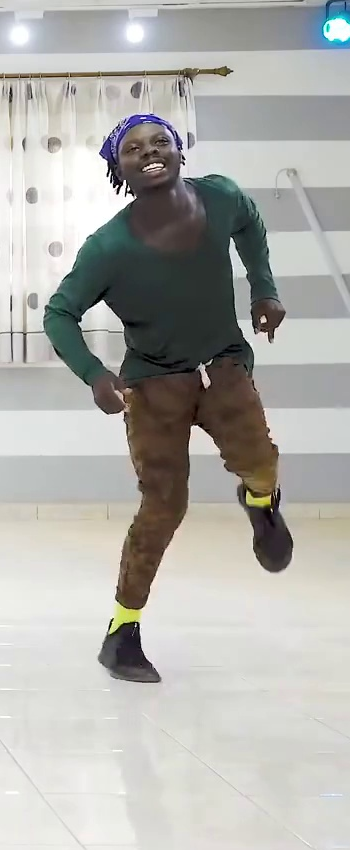

In [ ]:
im = Image.open('/content/frame1.jpg')

im.crop((1250, 200, 1600, 1050)) # i# m_crop_outside = im.crop((100, 175, 300, 250))

# im_crop_outside.save('frame0_first_man.jpg', quality=95)

In [ ]:
im1 = im.crop((1250, 200, 1600, 1050))

# Импорт модели глубоко обучения

In [ ]:
from torchvision.models.detection import (
    keypointrcnn_resnet50_fpn,
    KeypointRCNN_ResNet50_FPN_Weights,
)

In [ ]:
model = keypointrcnn_resnet50_fpn(weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1)

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth
100%|██████████| 226M/226M [00:04<00:00, 53.4MB/s]


# Ключевые точки, которые будут использоваться в анализе поз

In [ ]:
keypoints = ['nose','left_eye','right_eye',\
'left_ear','right_ear','left_shoulder',\
'right_shoulder','left_elbow','right_elbow',\
'left_wrist','right_wrist','left_hip',\
'right_hip','left_knee', 'right_knee', \
'left_ankle','right_ankle']

In [ ]:
orig_img = im1

# Предобработка одного изображения и прогонка его через модель глубокого обучения

In [ ]:
preprocess = transforms.Compose([transforms.ToTensor()])

x = preprocess(orig_img)

# torch.unsqueeze(x, 0).shape

model.eval()

with torch.no_grad():

  model_rez = model(torch.unsqueeze(x, 0))

# Функция для отрисовки ключевых точек

In [ ]:
def draw_keypoints_per_person(
    img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9
):

    # создаём спектр цветов

    cmap = plt.get_cmap("rainbow")

    # создаём копию изображений

    img_copy = img.copy()

    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    keypoints_name_coord = {}

    # для каждого задетектированного человека

    for person_id in range(len(all_keypoints)):

        # проверяем степень уверенности детектора

        if confs[person_id] > conf_threshold:

            # собираем ключевые точки конкретного человека

            keypoints = all_keypoints[person_id, ...]

            # собираем скоры для ключевых точек

            scores = all_scores[person_id, ...]

            # итерируем по каждому скору

            for kp in range(len(scores)):

                # проверяем степень уверенности детектора опорной точки

                if scores[kp] > keypoint_threshold:

                    # конвертируем массив ключевых точек в список целых чисел

                    keypoint = tuple(

                        map(int, keypoints[kp, :2].detach().numpy().tolist())

                    )

                    # выбираем цвет

                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)

                    # рисуем кружок радиуса 5 вокруг точки

                    cv2.circle(img_copy, keypoint, 5, color, -1)

                    print(keypoint, kp)

                    keypoints_name_coord[kp] = keypoint

                    plt.imshow(img_copy, interpolation='nearest')

                    plt.show()


    print(keypoints_name_coord)

    return img_copy

# Получение на одном кадре ключевых точек при прогонке функции расчета ключевых точек

(150, 153) 0


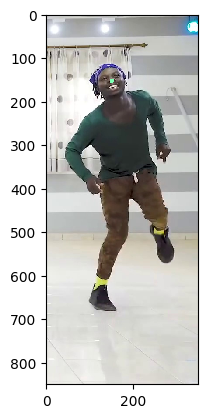

(159, 142) 1


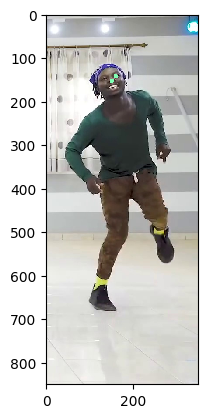

(131, 147) 2


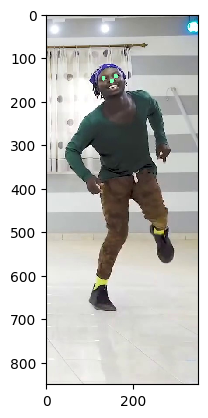

(179, 153) 3


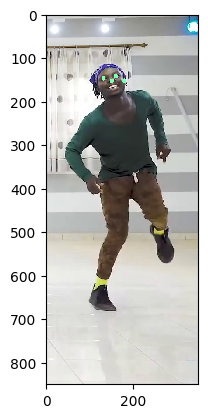

(118, 167) 4


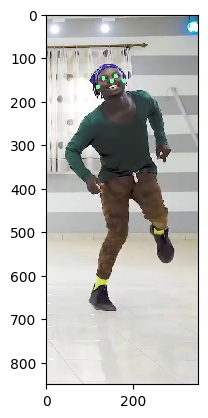

(221, 198) 5


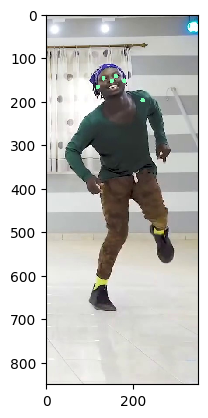

(108, 243) 6


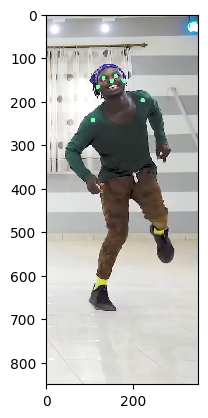

(251, 233) 7


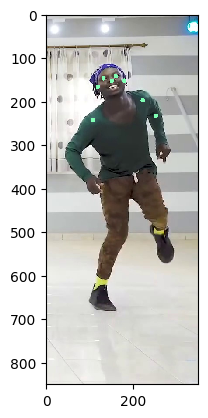

(60, 315) 8


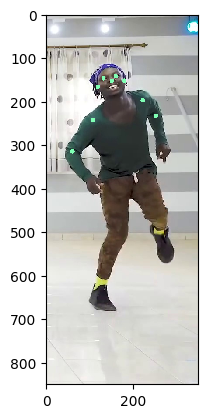

(263, 291) 9


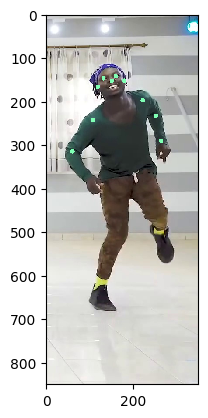

(94, 371) 10


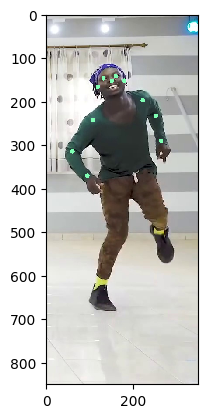

(226, 368) 11


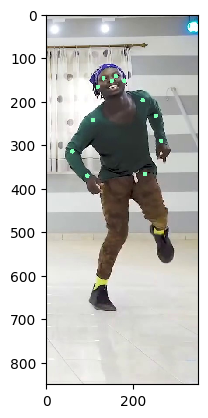

(155, 381) 12


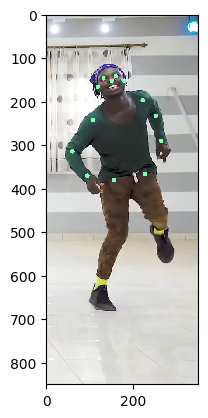

(254, 442) 13


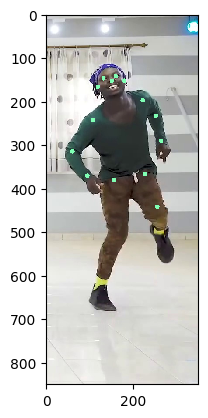

(161, 506) 14


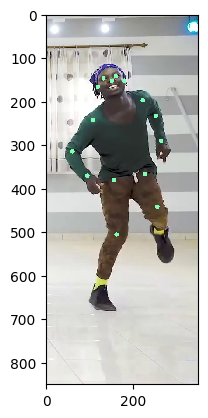

(260, 496) 15


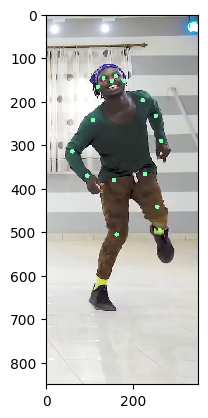

(126, 623) 16


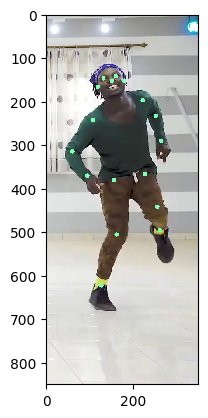

{0: (150, 153), 1: (159, 142), 2: (131, 147), 3: (179, 153), 4: (118, 167), 5: (221, 198), 6: (108, 243), 7: (251, 233), 8: (60, 315), 9: (263, 291), 10: (94, 371), 11: (226, 368), 12: (155, 381), 13: (254, 442), 14: (161, 506), 15: (260, 496), 16: (126, 623)}


In [ ]:
img_with_points = draw_keypoints_per_person(
    np.array(orig_img), model_rez[0]['keypoints'], model_rez[0]['keypoints_scores'], model_rez[0]['scores'], keypoint_threshold=2, conf_threshold=0.9
)

# Упорядочивание фреймов по номерам

In [ ]:
path = "/content"

dir_list = os.listdir(path)

In [ ]:
filenames = []

for filename in dir_list:

  if 'frame' in filename:

    filenames.append(filename)

In [ ]:
int(filenames[0].replace('frame','').replace('.jpg',''))

200

In [ ]:
frame_dict = {}

for filename in filenames:

  frame_dict[int(filename.replace('frame','').replace('.jpg',''))] = filename

In [ ]:
# model_rez_first_man = []

# for key in sorted(frame_dict):

#   print(frame_dict[key])

#   im = Image.open(f'/content/{frame_dict[key]}')

#   im_crop_outside = im.crop((550, 200, 900, 1050)) # im.crop((1250, 200, 1600, 1050)) im.crop((600, 200, 900, 1050))

#   fig = plt.figure(figsize=(6, 4))

#   ax = fig.add_subplot()

#   ax.imshow(im_crop_outside)

#   plt.show()

#   x = preprocess(im_crop_outside)

#   model_rez = model(torch.unsqueeze(x, 0))

#   model_rez_first_man.append(model_rez)

#   if key == 20:

#     break




# Определив область, внутри которой модельная поза помещается целиком мы собираем изображения в списки и результаты работы модели над каждым кадром также помещаем в списки для дальнейшего анализа
# В данном случае анализировали с 20 по 50 кадры


In [ ]:
model_rez_first_man = []

pics_first_man = []

pics_sec_man = []

model_rez_sec_man = []

for key in sorted(frame_dict):



  if key > 20 and key < 50:

    print(frame_dict[key])

    im = Image.open(f'/content/{frame_dict[key]}')

    im_crop_1_man = im.crop((600, 200, 950, 1050)) # im.crop((1250, 200, 1600, 1050)) im.crop((600, 200, 900, 1050))

    pics_first_man.append(im_crop_1_man)

    # im.crop((1250, 200, 1600, 1050))

    im_crop_2_man = im.crop((1300, 200, 1650, 1050))

    pics_sec_man.append(im_crop_2_man)

    # fig = plt.figure(figsize=(6, 4))

    # ax = fig.add_subplot()

    # ax.imshow(im_crop_outside)

    # plt.show()

    x1 = preprocess(im_crop_1_man)

    x2 = preprocess(im_crop_2_man)

    with torch.no_grad():

      model_rez1 = model(torch.unsqueeze(x1, 0))

      model_rez2 = model(torch.unsqueeze(x2, 0))

    model_rez_first_man.append(model_rez1)

    model_rez_sec_man.append(model_rez2)

  # if key == 20:

  #   break

frame21.jpg
frame22.jpg
frame23.jpg
frame24.jpg
frame25.jpg
frame26.jpg
frame27.jpg
frame28.jpg
frame29.jpg
frame30.jpg
frame31.jpg
frame32.jpg
frame33.jpg
frame34.jpg
frame35.jpg
frame36.jpg
frame37.jpg
frame38.jpg
frame39.jpg
frame40.jpg
frame41.jpg
frame42.jpg
frame43.jpg
frame44.jpg
frame45.jpg
frame46.jpg
frame47.jpg
frame48.jpg
frame49.jpg


# Функция для отрисовки конечностей и вычиления ключевых точек. Конечности отрисовываем на каждом фрейме

In [ ]:
def draw_keypoints_per_person_with_limbs_model_next(
    img, all_keypoints, all_scores, confs, limbs, keypoint_threshold=2, conf_threshold=0.9
):

    # создаём спектр цветов

    cmap = plt.get_cmap("rainbow")

    # создаём копию изображений

    img_copy = img.copy()

    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    keypoints_name_coord = {}

    conf1 = []

    # для каждого задетектированного человека

    for person_id in range(len(all_keypoints)):

        # проверяем степень уверенности детектора

        if confs[person_id] > conf_threshold:

            # собираем ключевые точки конкретного человека

            print(confs[person_id])

            keypoints = all_keypoints[person_id, ...]

            # собираем скоры для ключевых точек

            scores = all_scores[person_id, ...]

            # итерируем по каждому скору

            for kp in range(len(scores)):

                # проверяем степень уверенности детектора опорной точки

                if scores[kp] > keypoint_threshold:

                    # конвертируем массив ключевых точек в список целых чисел

                    keypoint = tuple(

                        map(int, keypoints[kp, :2].detach().numpy().tolist())

                    )

                    # выбираем цвет

                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)

                    # рисуем кружок радиуса 5 вокруг точки

                    cv2.circle(img_copy, keypoint, 5, color, -1)

                    # print(keypoint, kp)

                    keypoints_name_coord[kp] = keypoint

                    # print(keypoint)

                    # conf1.append(scores[kp])

                    # plt.imshow(img_copy, interpolation='nearest')

                    # plt.show()


    # print(scores)

    # print(keypoints_name_coord)

    for limb_index in range(len(limbs)):

      # print(limbs[limb_index][1])

      if limbs[limb_index][1] not in keypoints_name_coord:

        keypoints_name_coord[limbs[limb_index][1]] = keypoints_name_coord[0]

      if limbs[limb_index][0] not in keypoints_name_coord:

        keypoints_name_coord[limbs[limb_index][0]] = keypoints_name_coord[0]

    # print(keypoints_name_coord)

    sorted_keypoints_name_coord = dict(sorted(keypoints_name_coord.items()))

    # print(sorted_keypoints_name_coord.values())

    for limb in limbs:

      cv2.line(img_copy, keypoints_name_coord[limb[0]], keypoints_name_coord[limb[1]], (0, 255, 0), thickness=4)

    # conf1 = model_rez[1][0]['keypoints_scores'][0].detach().numpy()

    conf1 = all_scores[0]



    return img_copy, list(sorted_keypoints_name_coord.values()), conf1

# Список конечностей

In [ ]:
def get_limbs_from_keypoints(keypoints):
    limbs = [
        [keypoints.index("right_eye"), keypoints.index("nose")],
        [keypoints.index("right_eye"), keypoints.index("right_ear")],
        [keypoints.index("left_eye"), keypoints.index("nose")],
        [keypoints.index("left_eye"), keypoints.index("left_ear")],
        [keypoints.index("right_shoulder"), keypoints.index("right_elbow")],
        [keypoints.index("right_elbow"), keypoints.index("right_wrist")],
        [keypoints.index("left_shoulder"), keypoints.index("left_elbow")],
        [keypoints.index("left_elbow"), keypoints.index("left_wrist")],
        [keypoints.index("right_hip"), keypoints.index("right_knee")],
        [keypoints.index("right_knee"), keypoints.index("right_ankle")],
        [keypoints.index("left_hip"), keypoints.index("left_knee")],
        [keypoints.index("left_knee"), keypoints.index("left_ankle")],
        [keypoints.index("right_shoulder"), keypoints.index("left_shoulder")],
        [keypoints.index("right_hip"), keypoints.index("left_hip")],
        [keypoints.index("right_shoulder"), keypoints.index("right_hip")],
        [keypoints.index("left_shoulder"), keypoints.index("left_hip")],
    ]
    return limbs


limbs = get_limbs_from_keypoints(keypoints)

# Для первой модельной позы получаем списки изображений с конечностями, набора точек и количества очков уверенности (conf1) для входного изображения

In [ ]:
imgs_with_limbs = []

points_with_limbs = []

conf1_with_limbs = []

for index in range(len(model_rez_first_man)):

  img_with_points, points, conf1 = draw_keypoints_per_person_with_limbs_model_next(
    np.array(pics_first_man[index]), model_rez_first_man[index][0]['keypoints'], model_rez_first_man[index][0]['keypoints_scores'], model_rez_first_man[index][0]['scores'], limbs,  keypoint_threshold=2, conf_threshold=0.9)

  imgs_with_limbs.append(img_with_points)

  points_with_limbs.append(points)

  conf1_with_limbs.append(conf1)

  print(len(conf1),len(points))

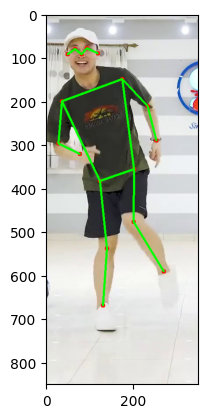

In [ ]:
plt.imshow(imgs_with_limbs[0])

# Собираем видео с прорисованными конечностями для модельной позы

In [ ]:
frame = imgs_with_limbs


height, width, layers = imgs_with_limbs[0].shape

video = cv2.VideoWriter(r'/content/video_test1.avi',cv2.VideoWriter_fourcc(*'MJPG'),5,(width,height))

_ = [video.write(i) for i in frame]

video.release()

cv2.destroyAllWindows()

# Аналогично получаем списки изображений с конечностями (для видео), ключевых точек и уверенностей для входного изображения

In [ ]:
imgs_with_limbs_sec_man = []

points_with_limbs_sec_man = []

conf1_with_limbs_sec_man = []

for index in range(len(model_rez_first_man)):

  img_with_points, points, conf1 = draw_keypoints_per_person_with_limbs_model_next(
    np.array(pics_sec_man[index]), model_rez_sec_man[index][0]['keypoints'], model_rez_sec_man[index][0]['keypoints_scores'], model_rez_sec_man[index][0]['scores'], limbs,  keypoint_threshold=2, conf_threshold=0.9)

  imgs_with_limbs_sec_man.append(img_with_points)

  points_with_limbs_sec_man.append(points)

  conf1_with_limbs_sec_man.append(conf1)

  print(len(conf1),len(points))

# Создаем тестовое видео с входным персонажем (позу которого сравниваем с модельной)

In [ ]:
frame = imgs_with_limbs_sec_man


height, width, layers = imgs_with_limbs_sec_man[0].shape

video = cv2.VideoWriter(r'/content/video_test2.avi',cv2.VideoWriter_fourcc(*'MJPG'),5,(width,height))

_ = [video.write(i) for i in frame]

video.release()

cv2.destroyAllWindows()

# Собираем позы модельного персонажа и входного персонажа в одни изображения для дальнейшего создания из них видео


In [ ]:
from PIL import Image

for index in range(len(imgs_with_limbs)):

  foreground1 = Image.fromarray(imgs_with_limbs[index])

  foreground2 = Image.fromarray(imgs_with_limbs_sec_man[index])

  new_im = Image.new('RGB', (2*width,height), (250,250,250))

  new_im.paste(foreground1, (0,0))

  new_im.paste(foreground2, (width-1,0))

  new_im.save(f"merged_images{index}.png", "png")


In [ ]:
video_frames = []

for index in range(len(imgs_with_limbs)):

  video_frames.append(cv2.imread(f'/content/merged_images{index}.png'))

# Тестируем и создаем видео обоих персонажей

In [ ]:
frame = video_frames


height, width, layers = video_frames[0].shape

video = cv2.VideoWriter(r'/content/video.avi',cv2.VideoWriter_fourcc(*'MJPG'),5,(width,height))

_ = [video.write(i) for i in frame]

video.release()

cv2.destroyAllWindows()

# Вводим функции расчета косинусной близости (из torch) и взвешенной дистанции


In [ ]:
torch.nn.functional.cosine_similarity(torch.tensor(points_with_limbs[5], dtype=torch.float32), torch.tensor(points_with_limbs_sec_man[5], dtype=torch.float32)).mean()

tensor(0.9931)

In [ ]:
def weight_distance(pose1, pose2, conf1):

    # D(U,V) = (1 / sum(conf1)) * sum(conf1 * ||pose1 - pose2||) = sum1 * sum2

    sum1 = 1 / np.sum(conf1)

    sum2 = 0

    for i in range(len(pose1)):

        # каждый индекс i имеет x и y, у которых одинаковая оценка достоверности

        conf_ind = math.floor(i / 2)

        sum2 = conf1[conf_ind] * abs(pose1[i] - pose2[i])

    weighted_dist = sum1 * sum2

    return weighted_dist

# Расчитываем косинусную близость и взвешенную дистанцию для обоих персонажей и помещаем все в списки


In [ ]:
cossim_mean = []

weight_dist = []

for index in range(len(points_with_limbs)):

  cossim_mean.append(torch.nn.functional.cosine_similarity(torch.tensor(points_with_limbs[index], dtype=torch.float64), torch.tensor(points_with_limbs_sec_man[index], dtype=torch.float64)).numpy().mean())

  weight_dist.append(weight_distance(np.array(points_with_limbs[index]), np.array(points_with_limbs_sec_man[index]), np.array(conf1_with_limbs[index].detach().numpy()) ))

# Прописываем полученные значения на каждом фрейме получающегося видео


In [ ]:
from PIL import Image

from PIL import ImageFont

from PIL import ImageDraw

for index in range(len(cossim_mean)):

  img = Image.open(f"/content/merged_images{index}.png")

  draw = ImageDraw.Draw(img)

  # font = ImageFont.truetype(<font-file>, <font-size>)

  font = ImageFont.truetype("/content/ArialMT.ttf", 25)

  # draw.text((x, y),"Sample Text",(r,g,b))

  CS = np.round((cossim_mean[index]), 4)

  WD = np.round((weight_dist[index][0] ** 2 + weight_dist[index][1] ** 2) ** 0.5, 2)

  draw.text((150, height - 150),f"COSSIM = {CS}, WD = {WD} ",(255,0,255),font=font)

  img.save(f'sample-out{index}.jpg')

# Создаем финальное видео


In [ ]:
video_frames = []

for index in range(len(cossim_mean)):

  video_frames.append(cv2.imread(f'/content/sample-out{index}.jpg'))

In [ ]:
frame = video_frames


height, width, layers = video_frames[0].shape

video = cv2.VideoWriter(r'/content/video_pre_release.avi',cv2.VideoWriter_fourcc(*'MJPG'),5,(width,height))

_ = [video.write(i) for i in frame]

video.release()

cv2.destroyAllWindows()

# Подобный алгоритм можно применять для оценки и сравнения поз при любых занятиях, например, пилатес